## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Further EDA of the selected features using 4 regions

In [2]:
def add_trendline(x, y, ax):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle="--", linewidth=2, color="gray")

In [3]:
variables = [
    "Availability",
    "Agricultural_use",
    "Public_urban_use",
    "Services_use",
    "Temperature",
    "Domestic_use",
]
regions = [
    "Península de Baja California",
    "Balsas",
    "Lerma Santiago Pacífico",
    "Noroeste",
]

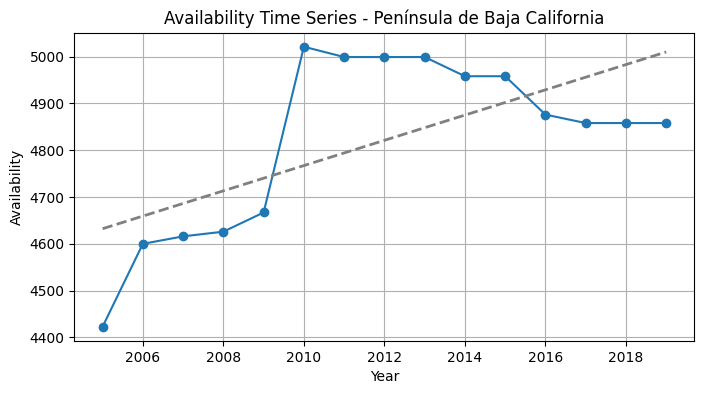

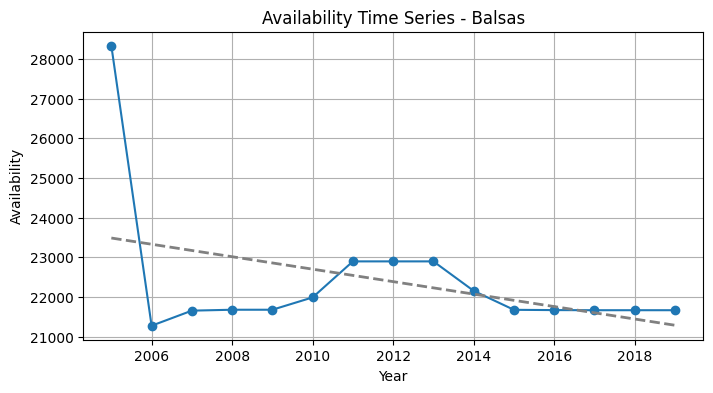

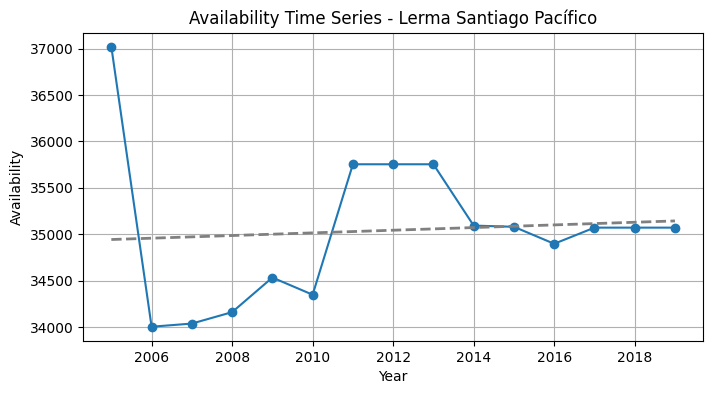

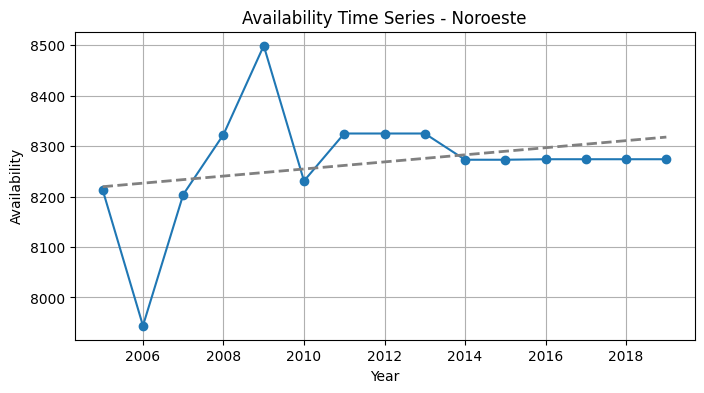

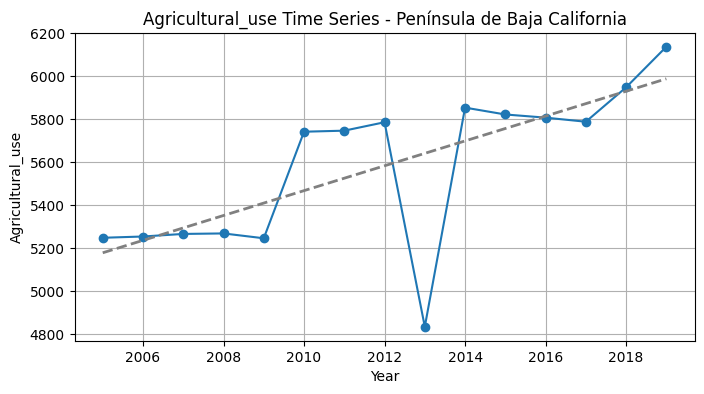

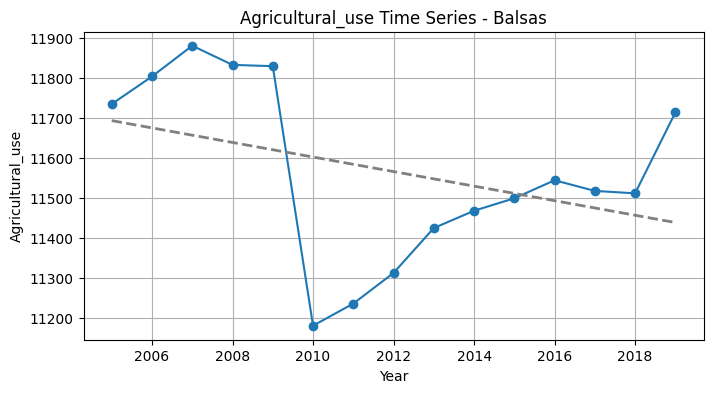

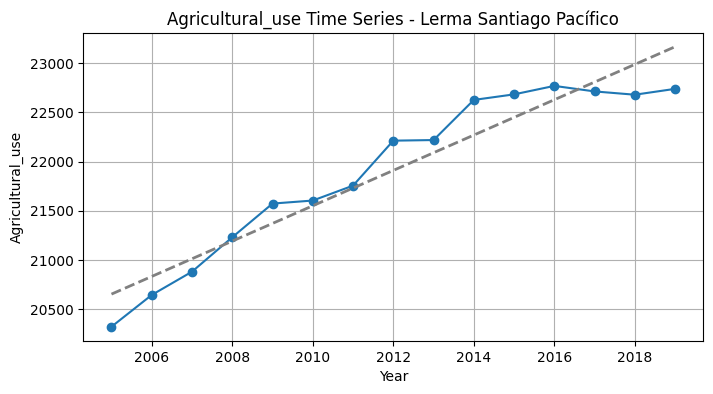

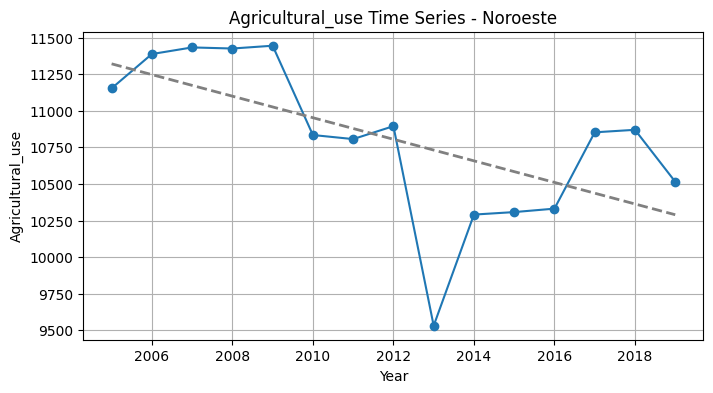

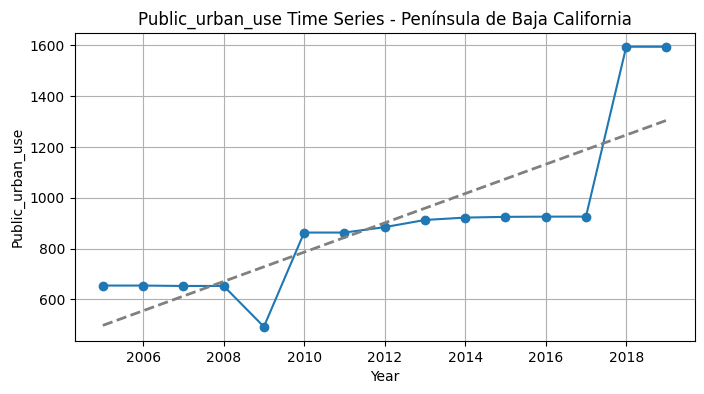

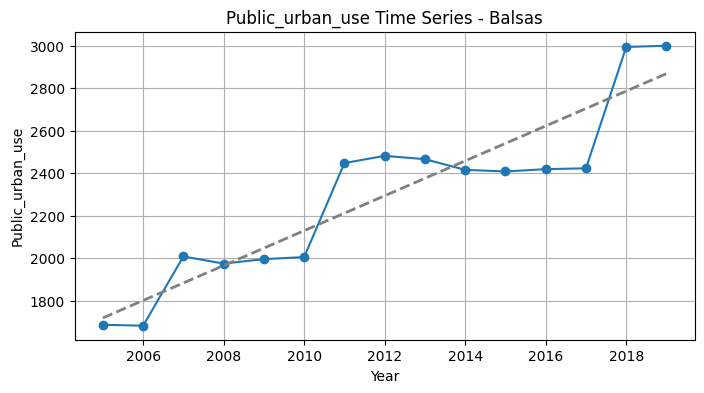

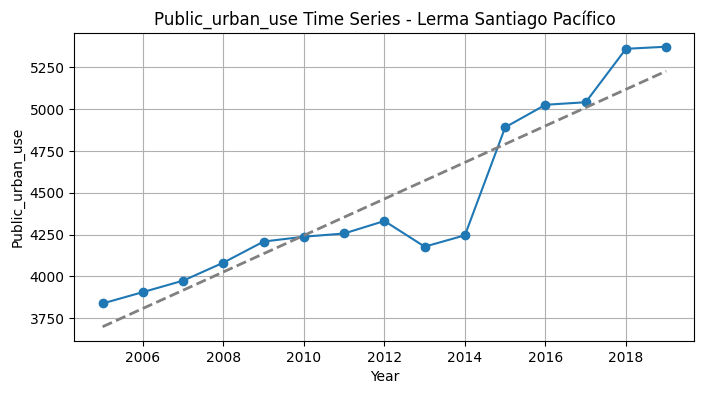

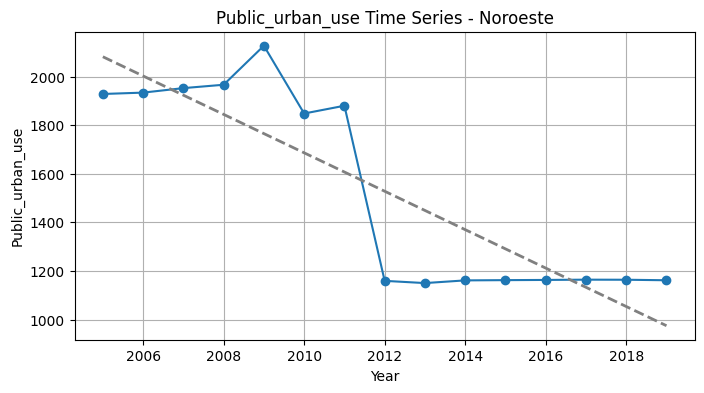

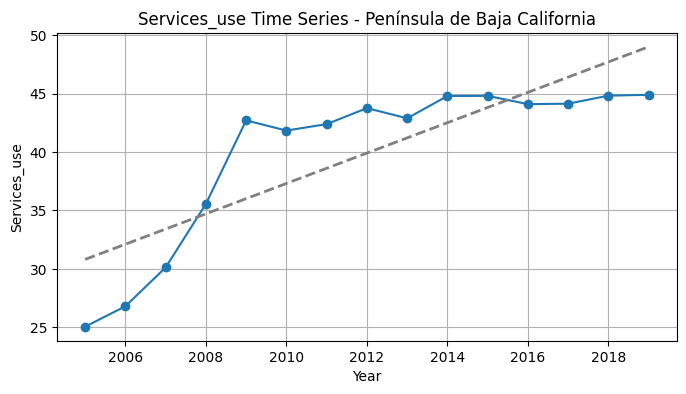

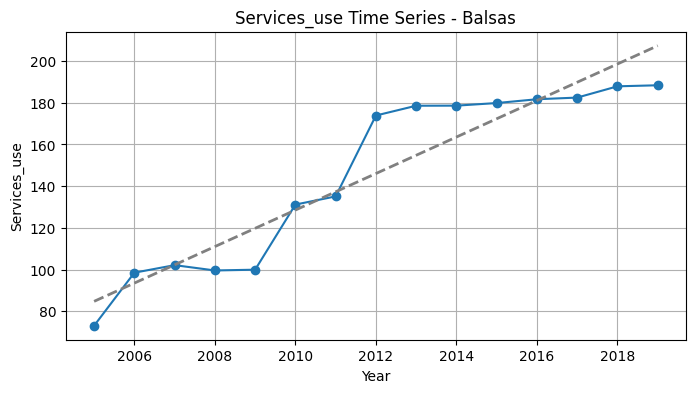

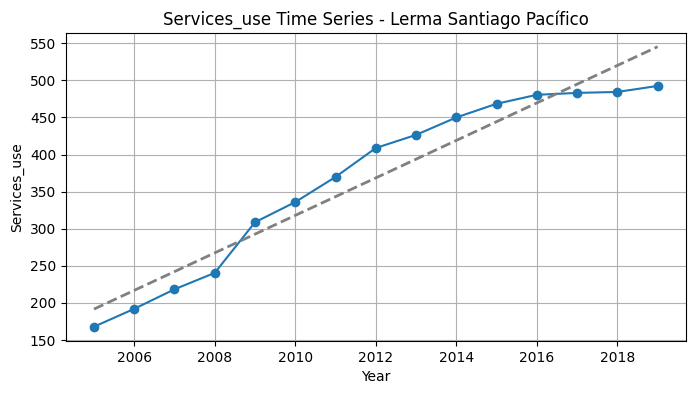

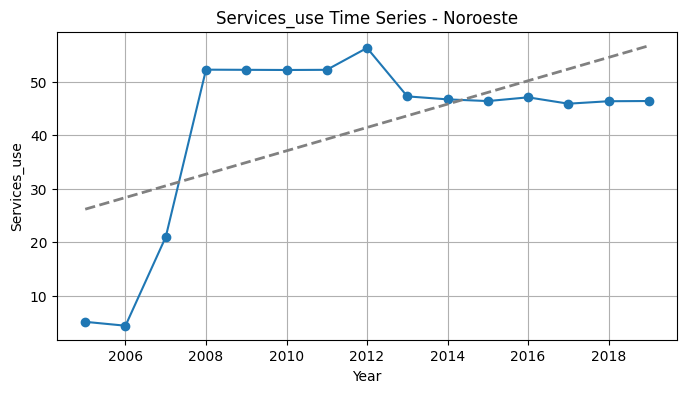

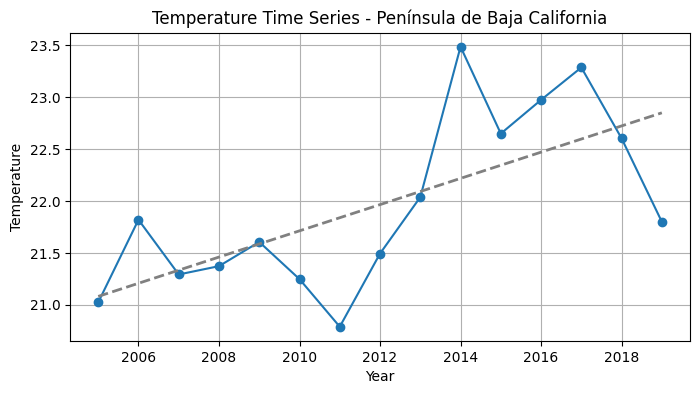

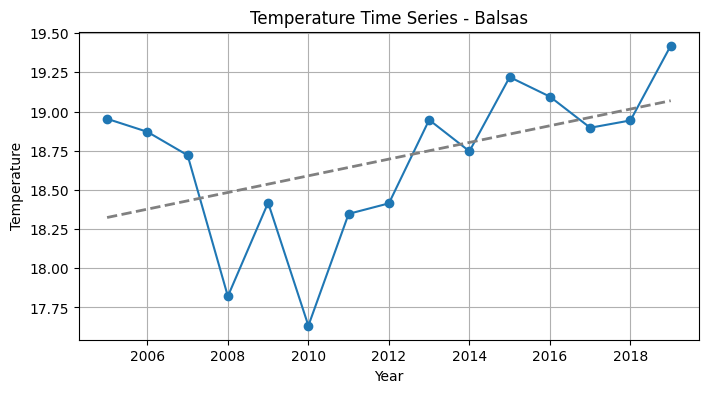

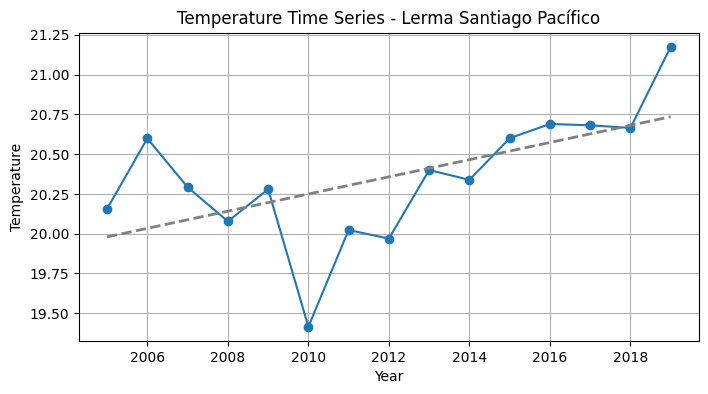

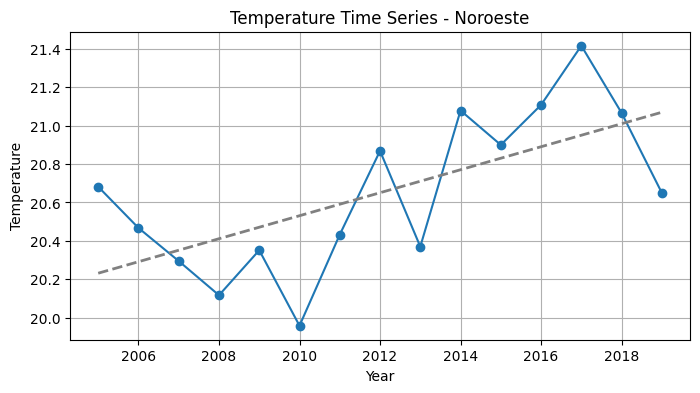

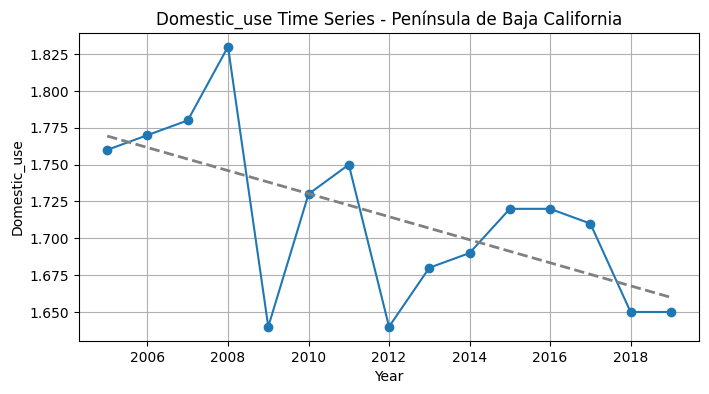

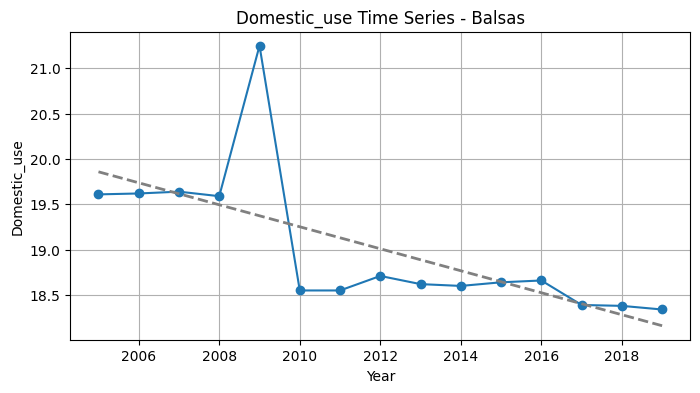

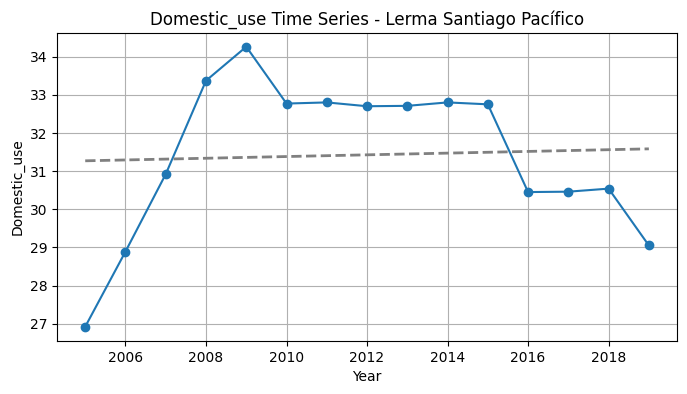

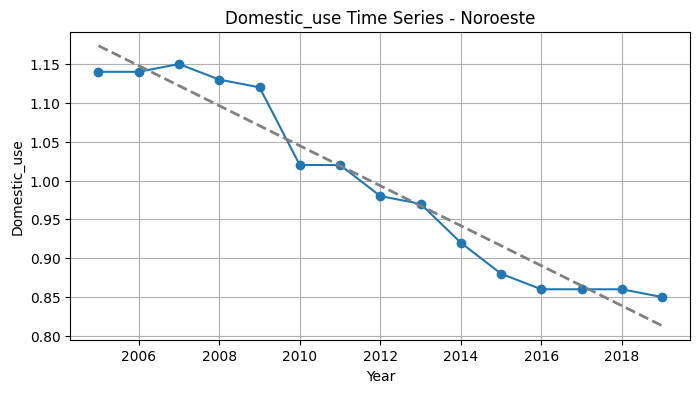

In [4]:
for variable in variables:
    for region in regions:
        filename = f"./../Data/{variable}.xlsx"
        df = pd.read_excel(filename)

        df_filtered = df[df["Nombre"] == region]
        df_melted = df_filtered.melt(
            id_vars=["Clave", "Nombre"], var_name="Year", value_name=variable
        )

        df_melted["Year"] = pd.to_numeric(df_melted["Year"])

        plt.figure(figsize=(8, 4))
        plt.plot(df_melted["Year"], df_melted[variable], marker="o", label=region)

        add_trendline(df_melted["Year"], df_melted[variable], plt.gca())

        plt.title(f"{variable} Time Series - {region}")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        plt.show()